# Gerardo de Miguel González

## Práctica 5 de Estadística para Data Science

### Problema 1 

*Realiza las siguientes tareas*:

i) Simula 50 tiradas de un dado.

::GMG::Reference

 - [R Documentation: sample](https://www.rdocumentation.org/packages/base/versions/3.5.1/topics/sample)
 - [Chapter 7: Sampling and Replication: 4 the_sample_function](https://ademos.people.uic.edu/Chapter7.html#4_the_sample_function)
 - [Stackoverflow:Elegant solution to count rolling two dice?](https://stackoverflow.com/questions/38176831/elegant-solution-to-count-rolling-two-dice)

In [1]:
#::GMG::Podemos simular una tirada de N dados con sample() que implementa
#       simple random sampling, https://en.wikipedia.org/wiki/Simple_random_sample
tirada<-function (dado, n_dados) {
        return (sample(dado,n_dados,replace=TRUE))
      }

dado<-1:6
n_dados<-1
#::GMG::Una tirada de UN dado
print(tirada(dado,n_dados))
#::GMG::Una tirada de DOS dados
print(tirada(dado,n_dados+1))

[1] 1
[1] 3 4


In [2]:
#::GMG::50 tiradas de 1 dado
#  (o) Una manera es repetir 50 veces la tirada de 1 dado con sample() (bootstraping)
#::nota::Fijamos el experimento con una semilla
set.seed(1)
n_tiradas<-50
tiradas<-replicate(n_tiradas, tirada(dado, n_dados))
print(tiradas)
#  (o) Otra es interpretar cada muestreo con reemplazo como una tirada
tiradas2<-sample(x = dado,size = n_tiradas,replace=TRUE)
print(tiradas2)

 [1] 2 3 4 6 2 6 6 4 4 1 2 2 5 3 5 3 5 6 3 5 6 2 4 1 2 3 1 3 6 3 3 4 3 2 5 5 5 1
[39] 5 3 5 4 5 4 4 5 1 3 5 5
 [1] 3 6 3 2 1 1 2 4 4 3 6 2 3 2 4 2 3 5 1 6 3 6 3 3 3 6 6 3 5 6 3 5 3 2 5 2 5 1
[39] 2 1 2 1 4 6 5 5 3 3 5 4


ii) Considera la variable aleatoria, X, definida como el número que sale al tirar el dado.
¿Cuánto valen $\bar{X}, S^2, E(X), Var(X), E(\bar{X})$ y $Var(\bar{X})$?

**::GMG::** Referencia para poner expresiones de estadística en Markdown (enunciado) 

 - [R Markdown](http://pages.stat.wisc.edu/~jgillett/371/RStudio/RMarkdown.pdf)

y referencias de apuntes de la asignatura:
 
 - Distribución uniforme discreta, apartado 4.1 pp. 25-26
 - Capítulo 5, apartados 5.1 a 5.7, pp. 33-35 (Muestreo)

In [3]:
#::GMG::Media y varianza muestrales
paste('::GMG::Media muestral: ',mean(tiradas))
paste('::GMG::Varianza muestral: ',signif(var(tiradas),4))

[1] "::GMG::Media muestral:  3.7"

[1] "::GMG::Varianza muestral:  2.378"

In [4]:
#::GMG::X número que sale al tirar un dado de seis caras x(i) ={1,2,3,4,5,6}
#       Distribución uniforme discreta, ref. 4.1 pp. 25-26 Apuntes Estadística M1965
#       p(x(i)) = 1/6, i = {1,2,3,4,5,6}
p_x_i = 1/length(dado)
paste('::GMG::Esperanza matemática/Media poblacional de Uniforme Discreta:',
      (dado[6] + dado[1])/2,'=', sum(p_x_i*dado)
     )
paste('::GMG::Varianza poblacional de Uniforme Discreta:',
      signif((length(dado)^2 - 1)/12,4),'=',
      signif((sum(p_x_i*dado^2) - sum(p_x_i*dado)^2),4))

[1] "::GMG::Esperanza matemática/Media poblacional de Uniforme Discreta: 3.5 = 3.5"

[1] "::GMG::Varianza poblacional de Uniforme Discreta: 2.917 = 2.917"

In [5]:
#::GMG::Esperanza y varianza de la media muestral, que es una variable aleatoria
# Capítulo 5, apartados 5.1 a 5.7, pp. 33-35 (Muestreo)
paste('::GMG::Esperanza de la media muestral como variable aleatoria:',
      sum(tiradas)/n_tiradas)
paste('::GMG::Varianza de la media muestral como variable aleatoria:',
      signif((sum(tiradas^2)/n_tiradas - (sum(tiradas)/n_tiradas)^2),4))

[1] "::GMG::Esperanza de la media muestral como variable aleatoria: 3.7"

[1] "::GMG::Varianza de la media muestral como variable aleatoria: 2.33"

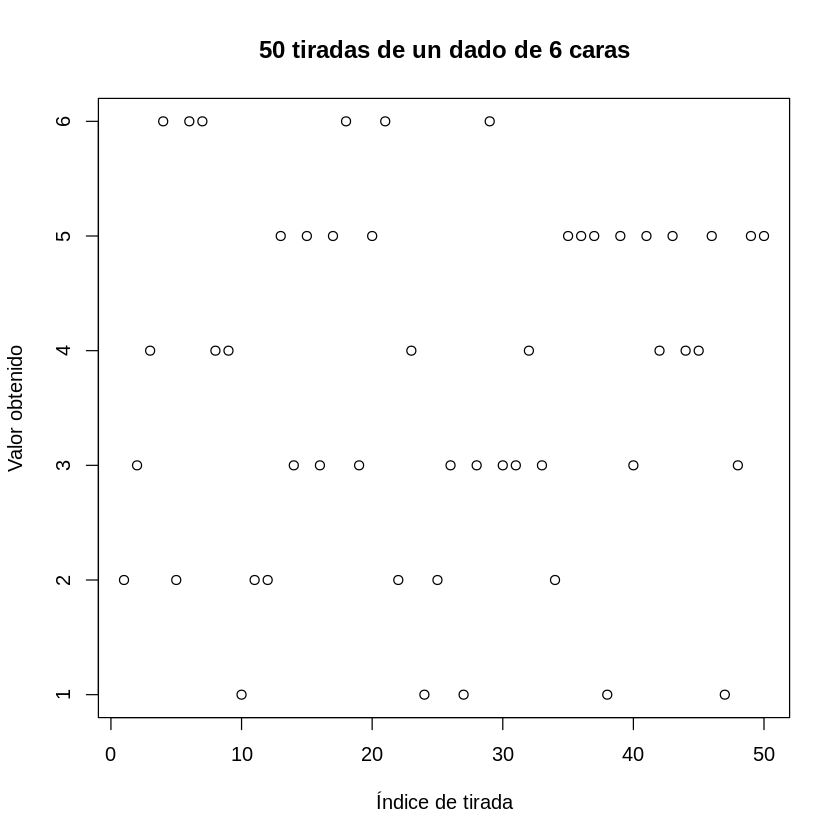

In [8]:
#::GMG:Dibujamos las tiradas
plot(tiradas, 
     main='50 tiradas de un dado de 6 caras',
     xlab='Índice de tirada', 
     ylab='Valor obtenido'
    )

### Problema 2 

*Realiza las siguientes tareas:*

i) Simula 50 tiradas de dos dados.

In [9]:
#::GMG::Tirada de 2 dados
set.seed(1)
n_dados <- 2
tira2dados <- sample(dado,n_dados,replace=TRUE)
print(tira2dados)

[1] 2 3


In [10]:
#::GMG::50 tiradas de 2 dados en una matriz de 2x50, una tirada por columna (!)
set.seed(1)
print(replicate(n_tiradas, sample(dado, n_dados, replace = TRUE)))

     [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13] [,14]
[1,]    2    4    2    6    4    2    5    5    5     3     6     4     2     1
[2,]    3    6    6    4    1    2    3    3    6     5     2     1     3     3
     [,15] [,16] [,17] [,18] [,19] [,20] [,21] [,22] [,23] [,24] [,25] [,26]
[1,]     6     3     3     5     5     5     5     5     4     1     5     3
[2,]     3     4     2     5     1     3     4     4     5     3     5     6
     [,27] [,28] [,29] [,30] [,31] [,32] [,33] [,34] [,35] [,36] [,37] [,38]
[1,]     3     1     2     4     6     3     4     3     1     3     3     3
[2,]     2     1     4     3     2     2     2     5     6     6     3     6
     [,39] [,40] [,41] [,42] [,43] [,44] [,45] [,46] [,47] [,48] [,49] [,50]
[1,]     6     5     3     3     5     5     2     2     4     5     3     5
[2,]     3     6     5     2     2     1     1     1     6     5     3     4


ii) Considera la variable aleatoria, X, definida como la suma de los números que salen al
tirar dos dados. ¿Cuánto valen $\bar{X}, S^2, E(X), Var(X), E(\bar{X})$ y $Var(\bar{X})$?

In [11]:
#::GMG::Defino la variable aleatoria de la suma de la tirada de dos dados
suma.dados.rv <- function(caras = 6, n_dados = 2){
  tirada <- sample(1:caras, size = n_dados, replace = TRUE)
  return(sum(tirada))
}

In [12]:
#::GMG::Realizamos el experimento de las 50 tiradas obteniendo la suma de los números que salen
set.seed(1)
tiradas.50 <- replicate(n = n_tiradas,expr = suma.dados.rv())
str(tiradas.50)

 int [1:50] 5 10 8 10 5 4 8 8 11 8 ...


In [13]:
#::GMG::Hacemos los cálculos muestrales
paste('::GMG::Media muestral: ',mean(tiradas.50))
paste('::GMG::Varianza muestral: ',signif(var(tiradas.50),4))

[1] "::GMG::Media muestral:  7.18"

[1] "::GMG::Varianza muestral:  5.13"

In [14]:
#::GMG::X suma de los números que salen al tirar dos dados
# ::Q:: ¿Cuál es la distribución (pmf, cdf) de X? 
# ::A:: X es la suma de dos variables aleatorias discretas X_1 y X_2, una por dado
#::Ref::Apuntes de estadísica 3.11, pp.21 y 3.14, 3.15 pp. 23 y 3.16 pp.24(?)
p_x_i = 1/length(dado)
paste('::GMG::E(X)= E(X_1) +  E(X_2) =',
      (dado[6] + dado[1])/2 + (dado[6] + dado[1])/2)
paste('::GMG::Var(X) = Var(X_1) + Var(X_2):',
      signif((length(dado)^2 - 1)/12,4) + signif((length(dado)^2 - 1)/12,4))

[1] "::GMG::E(X)= E(X_1) +  E(X_2) = 7"

[1] "::GMG::Var(X) = Var(X_1) + Var(X_2): 5.834"

In [15]:
#::GMG::Esperanza y varianza de la media muestral, que es una variable aleatoria
# Capítulo 5, apartados 5.1 a 5.7, pp. 33-35 (Muestreo)
paste('::GMG::Esperanza de la media muestral como variable aleatoria:',
      sum(tiradas.50)/n_tiradas)
paste('::GMG::Varianza de la media muestral como variable aleatoria:',
      signif((sum(tiradas.50^2)/n_tiradas - (sum(tiradas.50)/n_tiradas)^2),4))

[1] "::GMG::Esperanza de la media muestral como variable aleatoria: 7.18"

[1] "::GMG::Varianza de la media muestral como variable aleatoria: 5.028"

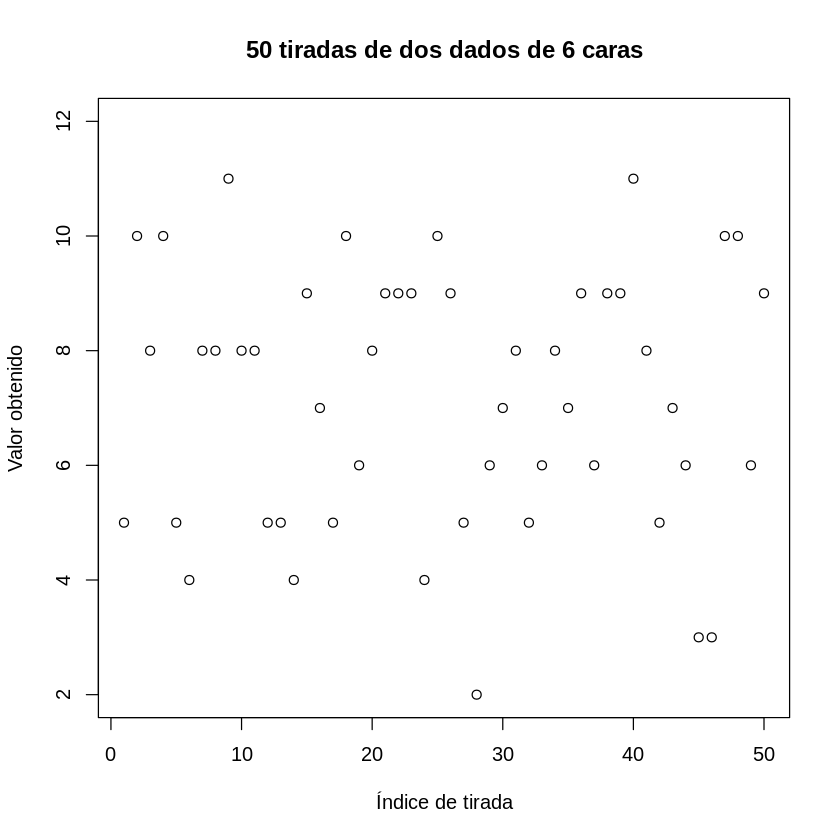

In [20]:
#::GMG:Dibujamos el resultado de las tiradas
plot(tiradas.50, 
     main='50 tiradas de dos dados de 6 caras',
     xlab='Índice de tirada', 
     ylab='Valor obtenido',
     xlim = c(1,50),
     ylim = c(2,12)
    )

### Problema 3 

*Realiza las siguientes tareas:*

i) Simula alturas de 50 personas de una población de altura media 176 cm y desviación típica 11
centímetros.

**::GMG::** Suponemos una variable aleatoria continua que representa a la altura de una persona con distribución normal $X \sim \mathcal{N}\left(\mu = 176,\sigma = 11\right)$ y generamos una muestra de tamaño 50.

In [21]:
set.seed(2)
alturas <- rnorm(n = 50, mean = 176,sd = 11)
str(alturas)

 num [1:50] 166 178 193 164 175 ...


ii) Considera la variable aleatoria, X, definida como la altura de una persona de la población
descrita anteriormente. ¿Cuánto valen $\bar{X}, S^2, E(X), Var(X), E(\bar{X})$ y $Var(\bar{X})$?

In [22]:
#::GMG::La media y varianza muestrales nos los proporciona R
paste('Media Muestral:',signif(mean(alturas),4),
      ' y Varianza muestral:',signif(var(alturas),4))

[1] "Media Muestral: 176.8  y Varianza muestral: 154.4"

In [23]:
#::GMG::La esperanza matemática y la varianza matemática son los parámetros mu y sigma^2
#       que nos proporcionan en el enunciado del problema
paste('E(X) = 176 cm','Var(X) =',11^2,'cm^2')

[1] "E(X) = 176 cm Var(X) = 121 cm^2"

In [24]:
#::GMG::La esperanza de la media muestral de tamaño n es igual a E(X) 
#       y la varianza de la media muestral de tamaño n es Var(X)/n (5.3 pp.34 apuntes)
paste('Esperanza matemática de la media muestral: 176 cm',
      'Varianza matemáica de la media muestral:',signif(11^2/50,4), 'cm^2')

[1] "Esperanza matemática de la media muestral: 176 cm Varianza matemáica de la media muestral: 2.42 cm^2"

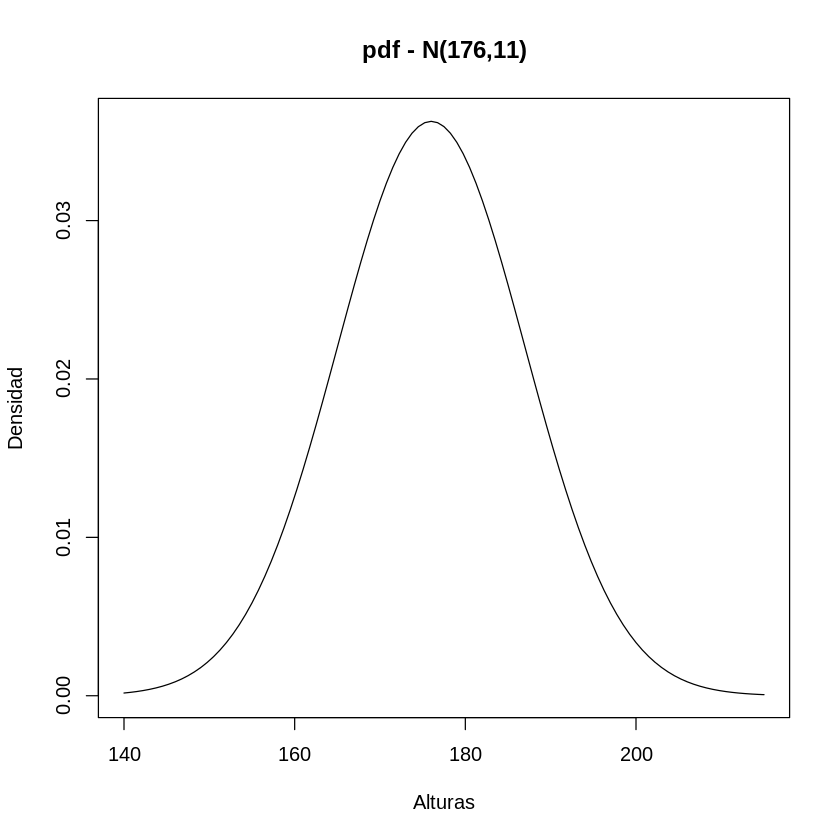

In [26]:
#::GMG::Dibujo la distribución de alturas
curve(dnorm(x,176,11), 
      140, 215, 
      main='pdf - N(176,11)',
      xlab='Alturas', 
      ylab='Densidad')

### Problema 4 

*Realiza las siguientes tareas:*

i) Simula el número de goles marcados en 10 partidos siendo el promedio de goles por partido en la liga 2.8.

**::GMG::** Esto es una simulación de un proceso de Poisson "*de libro*" suponiendo que 

1. el núnero de goles en intervalos no solapados de 90 minutos son independientes, 
2. la probabilidad de dos o más goles en un intervalo suficientemente corto es virtualmente cero (despreciable comparado con con la probabilidad de 0 o un gol en ese mismo intervalo) y
3. la probabilidad de observar exactamente un gol en un intervalo suficientemente pequeño es proporcional a la longitud de ese intervalo

In [30]:
#::GMG::R nos proporciona una manera directa de simular un proceso de poisson
set.seed(3)
goles <- rpois(n = 10, lambda = 2.8)
str(goles)
print(goles)

 int [1:10] 1 4 2 2 3 3 1 2 3 3
 [1] 1 4 2 2 3 3 1 2 3 3


ii) Considera la variable aleatoria, X, definida como el número de goles en un partido de la liga anteriormente mencionada. ¿Cuánto valen $\bar{X}, S^2, E(X), Var(X), E(\bar{X})$ y $Var(\bar{X})$?

In [31]:
#::GMG::Calculamos la media y varianza muestral de tamaño 10:
#::GMG::La media y varianza muestrales nos los proporciona R
paste('Media Muestral:',signif(mean(goles),4),
      ' y Varianza muestral:',signif(var(goles),4))

[1] "Media Muestral: 2.4  y Varianza muestral: 0.9333"

In [32]:
#::GMG::Los parámetros de población E(X) y Var(X) en una Poisson son iguales al promedio lambda
#       Apartado 4.5 pp. 28-29 apuntes
paste('E(X) = Var(X) = 2.8')

[1] "E(X) = Var(X) = 2.8"

In [33]:
#::GMG::La esperanza matemática y varianza matemática de la media muestral de tamaño 10
#     o Tenemos una muestra aleatoria tamaño 10 de una población
#     o Si la población es infinita, aplicamos apartado 5.3 media muestral pp. 34 apuntes
#     o La población es infinta si suponemos todos los partidos de todas las temporadas de todas
#       las ligas que han existido o existirán :)
paste('Esperanza matemática de la media muestral es E(X) = 2.8',
      'La Varianza matemática de la media muestral es Var(X)/n:', 2.8/10)

[1] "Esperanza matemática de la media muestral es E(X) = 2.8 La Varianza matemática de la media muestral es Var(X)/n: 0.28"

In [ ]:
#::nota::No obstante en este caso creo que es más realista suponer los partidos de una liga en una 
#       temporada determinada y entonces la población es finita formada por un número de partidos
#       de una temporada en concreto, de una división concreta, caso de "La Liga" (Primera División): 
#       20 equipos, 38 jornadas, 10 partidos/jornada -> N = 380 partidos
#
#::nota::También está la cuestión de si la muestra se realiza con reemplazo (random sampling) 
#        o sin reemplazo (simple random sampling)
#::DUDA::Este caso no lo tengo muy claro, ver pp. 206-212 de Ugarte et.al 

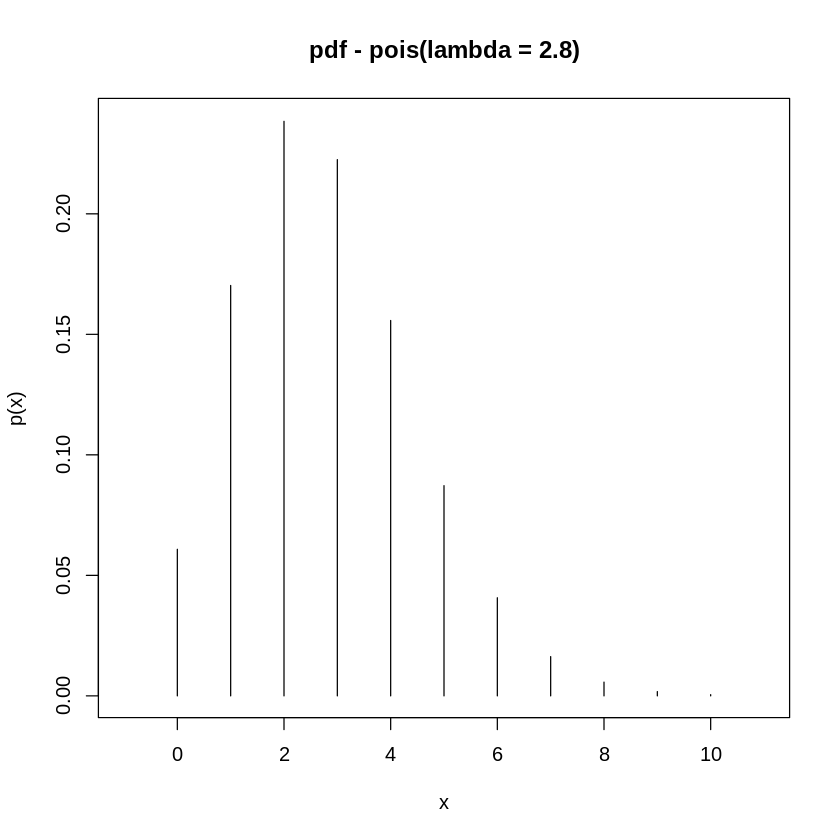

In [36]:
#::GMG::Dibujo la pdf de poisson
#       Ver pp. 123 Ugarte et al. Probabiliy and Statistics with R 
plot(0:10,
     dpois(0:10,2.8), 
     type = 'h',
     xlab = 'x', ylab = 'p(x)',
     xlim = c(-1,11),
     main = 'pdf - pois(lambda = 2.8)'
    )

### Problema 5 

Simula las posiciones de 32 fichas colocadas al azar en un tablero de 8 por 8 casillas, teniendo en cuenta que solo puede haber una ficha por casilla.

In [38]:
#::GMG::Básicamente tenemos 64 posibles posiciones de una matriz de 8x8 que pueden ser ocupadas 
#       con igual probabilidad (pdf uniforme) por 32 fichas ...
#       que es como rellenar con 32 unos matriz de R de 64 (8x8)
#::nota::Prueba de concepto (no fijo el número de fichas)
set.seed(4)
r <- 8
c <- 8
matrix(sample(0:1,r*c, replace=TRUE),r,c)

1,1,1,1,1,1,1,0
0,0,1,1,1,0,1,0
0,1,1,0,0,1,0,1
0,0,1,1,1,0,1,1
1,0,1,1,0,1,1,1
0,1,1,1,1,0,1,0
1,0,1,1,0,1,1,1
1,0,0,0,0,1,0,1


In [39]:
#::nota::Prueba de concepto (no fijo el número de fichas)
set.seed(4)
matrix(rbinom(r*c,1,0.5),r,c)

1,1,1,1,1,1,1,0
0,0,1,1,1,0,1,0
0,1,1,0,0,1,0,1
0,0,1,1,1,0,1,1
1,0,1,1,0,1,1,1
0,1,1,1,1,0,1,0
1,0,1,1,0,1,1,1
1,0,0,0,0,1,0,1


In [40]:
#::nota::Prueba de concepto (no fijo el número de fichas)
set.seed(4)
m <- 8
n <- 8
x <- sample.int (2, m*n, TRUE)-1L; 
dim(x) <- c(m,n)
x

1,1,1,1,1,1,1,0
0,0,1,1,1,0,1,0
0,1,1,0,0,1,0,1
0,0,1,1,1,0,1,1
1,0,1,1,0,1,1,1
0,1,1,1,1,0,1,0
1,0,1,1,0,1,1,1
1,0,0,0,0,1,0,1


In [41]:
#::nota::Prueba de concepto: genero las casillas que quiero rellenar
set.seed(4)
casillas <- 1:64
fichas <- 32
posiciones <- sample(casillas, fichas, replace = FALSE)

In [42]:
#::nota::meto las fichas en sus casillas :)
ficha <- 1
tablero <- matrix(data = 0,nrow = 8,ncol = 8)
tablero[posiciones] <- ficha
tablero

1,0,1,0,1,1,1,0
0,0,0,1,0,0,1,1
0,0,1,0,1,1,0,1
0,0,1,1,1,1,1,1
1,0,1,0,0,1,0,0
1,0,1,0,1,0,1,1
0,0,1,0,0,1,0,0
1,1,0,1,0,0,0,1


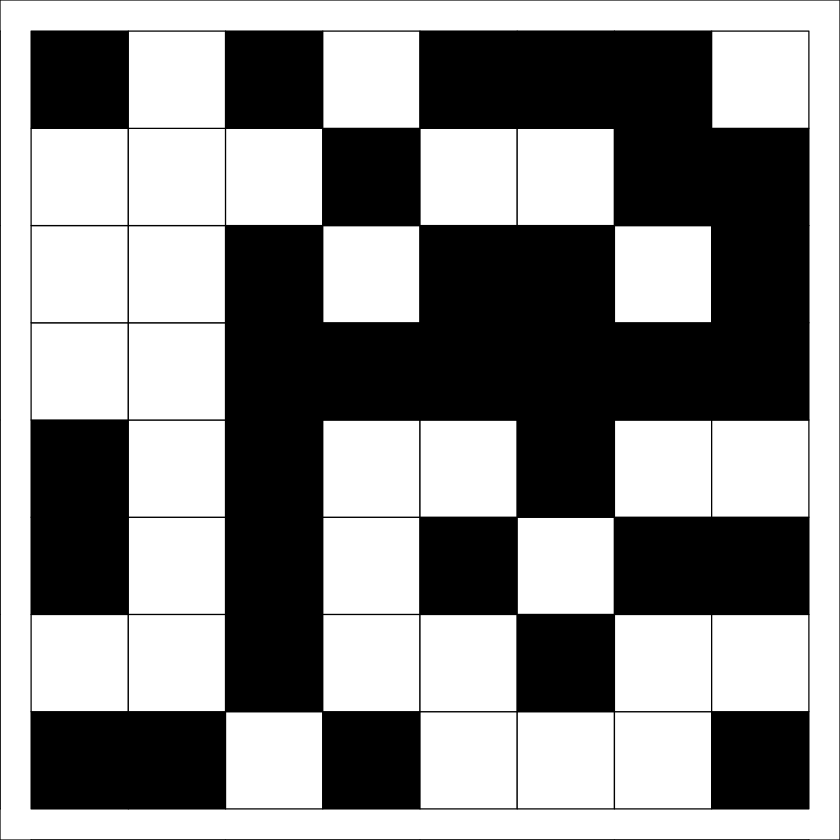

In [43]:
#::GMG::Dibujo el tablero
# https://stackoverflow.com/questions/28035831/how-to-build-a-crossword-like-plot-for-a-boolean-matrix
par(mar=rep(0, 4))
plot(tablero,
     xlim=c(0, ncol(tablero)), 
     ylim=c(0, nrow(tablero)), 
     asp=1, pch=NA)
o <- cbind(c(row(tablero)), c(col(tablero))) - 1
rect(o[, 1], o[, 2], o[, 1] + 1, o[, 2] + 1, col=t(tablero)[, ncol(tablero):1])

### Problema 6 

Representa gráficamente cada una de las muestras simuladas y guarda las gráficas en archivo.

In [44]:
#::GMG:: Ya lo he  hechjo en la secciones anteriores